In [7]:
import iminuit
from feynml import FeynmanDiagram, Leg, Propagator, Vertex, PDG
from pyfeyn2.render.latex.tikzfeynman import TikzFeynmanRender
from pyfeyn2.auto.position import auto_vdw,feynman_adjust_points,auto_grid,auto_align_legs,auto_remove_intersections_by_align_legs,auto_gridded_springs
import numpy as np
import pyfeyn2
print(pyfeyn2.__version__)

2.3.5


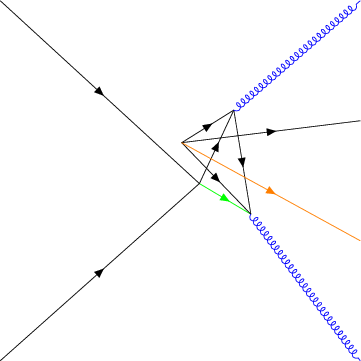

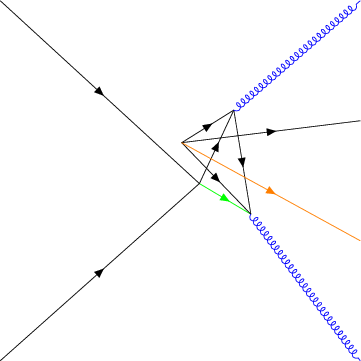

In [22]:
v1 = Vertex("v1").with_shape("dot")
v2 = Vertex("v2").with_style("symbol : dot")

fd = FeynmanDiagram().with_rules(
    """ * {color: red;} 
        [type=fermion] {color: blue; line: gluon}
        #p1 {color: green;}
        :not([type=fermion]) { color : black; line: fermion}""")
v1 = Vertex("v1")
v2 = Vertex("v2")
v3 = Vertex("v3")
v4 = Vertex("v4")
p1 = Propagator("p1").connect(v1, v2).with_type("gluon")
p2 = Propagator("p2").connect(v1, v3).with_type("gluon")
p3 = Propagator("p3").connect(v3, v2).with_type("gluon")
p4 = Propagator("p4").connect(v4, v3).with_type("gluon")
p5 = Propagator("p5").connect(v4, v2).with_type("gluon")
l1 = Leg("l1").with_target(v1).with_type("gluon").with_incoming().with_xy(2, 1)
l2 = Leg("l2").with_target(v1).with_type("gluon").with_incoming().with_xy(-2, -1)
l3 = Leg("l3").with_target(v2).with_type("fermion").with_outgoing().with_xy(2, -2).with_class("blue")
l4 = Leg("l4").with_target(v3).with_type("fermion").with_outgoing().with_xy(2, 2)
l5 = Leg("l5").with_target(v4).with_type("gluon").with_outgoing().with_xy(2, 1)
l6 = Leg("l6").with_target(v4).with_type("gluon").with_outgoing().with_xy(-2, -1)

l6.style.color = "orange"

fd.propagators.extend([p1, p2, p3, p4, p5])
fd.vertices.extend([v1, v2, v3, v4])
fd.legs.extend([l1, l2, l3, l4, l5, l6])
fd = feynman_adjust_points(fd,size=10)
fd = auto_align_legs(fd)
tfd = TikzFeynmanRender(fd)
tfd.render()

In [15]:
points = [*fd.vertices]
all_points = [*fd.vertices , *fd.legs]
cons = []
#dist = []
for p in points:
    n = []
    #dd = []
    for c in fd.get_neighbours(p):
        for j,pp in enumerate(all_points):
            if pp.id == c.id:
                 n.append(j)
                 #dd.append(np.sqrt((p.x - pp.x) ** 2 + (p.y - pp.y) ** 2))
    cons.append(n)

r = 1.0

def fun(*args):
    for i,p in enumerate(points):
        p.x = args[2*i]
        p.y = args[2*i+1]
    LJ = 0
    for i,p in enumerate(points):
        for j in cons[i]:
            LJ = LJ - (((((p.x - all_points[j].x)**2 + ((p.y - all_points[j].y))**2)**0.5)/r)**6) + ((((p.x - all_points[j].x)**2 + ((p.y - all_points[j].y))**2)**0.5)/r)**12 
    return LJ
m = iminuit.Minuit(fun,*[0 for _ in range(len(points)*2)])
v = m.migrad()
v

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.617e+08                  │             Nfcn = 1148              │
│ EDM = 3.37e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  2.58406  │  0.00005  │            │            │         │         │       │
│ 1 │ x1   │ 5.142857  │ 0.000032  │            │            │         │         │       │
│ 2 │ x2   │  6.37287  │  0.00008  │            │            │         │         │       │
│ 3 │ x3   │  3.29599  │  0.00010  │            │            │         │         │       │
│ 4 │ x4   │  6.37287  │  0.00008  │            │            │         │         │       │
│ 5 │ x5   │  6.98972  │  0.00010  │            │            │         │         │       │
│ 6 │ x6   │  7.9607   │  0.0007   │            │            │         │         │       │
│ 7 │ x7   │  5.1429   │  0.0007   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────────────────────────────────────────────┐
│    │        x0        x1        x2        x3        x4        x5        x6        x7 │
├────┼─────────────────────────────────────────────────────────────────────────────────┤
│ x0 │  2.61e-09        -0    1.6e-9    0.3e-9    1.6e-9   -0.3e-9    0.9e-9         0 │
│ x1 │        -0  1.02e-09   -0.1e-9    0.3e-9    0.1e-9    0.3e-9        -0    0.1e-9 │
│ x2 │    1.6e-9   -0.1e-9  6.45e-09      5e-9     -0e-9      2e-9      2e-9      4e-9 │
│ x3 │    0.3e-9    0.3e-9      5e-9  1.03e-08     -2e-9  0.005e-6  0.002e-6  0.007e-6 │
│ x4 │    1.6e-9    0.1e-9     -0e-9     -2e-9  6.44e-09     -5e-9      2e-9     -4e-9 │
│ x5 │   -0.3e-9    0.3e-9      2e-9  0.005e-6     -5e-9  1.03e-08 -0.002e-6  0.007e-6 │
│ x6 │    0.9e-9        -0      2e-9  0.002e-6      2e-9 -0.002e-6  5.17e-07        -0 │
│ x7 │         0    0.1e-9      4e-9  0.007e-6     -4e-9  0.007e-6        -0  5.57e-07 │
└────┴─────────────────────────────────────────────────────────────────────────────────┘

In [20]:
args= list(v.values.to_dict().values())
for i,p in enumerate(points):
    p.x = args[2*i]
    p.y = args[2*i+1]

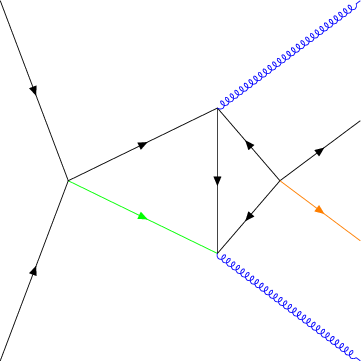

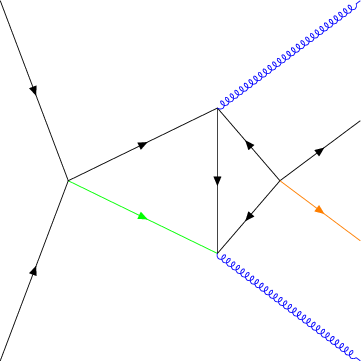

In [21]:
tfd = TikzFeynmanRender(fd)
tfd.render()